<h2><center>Week 6 - Assignment - Solutions</center></h2>
<h3><center>Programming for Data Science 2024</center></h3>

Exercises for the topics covered in the sixth lecture.

The exercise will be marked as passed if you get **at least 10/15** points.

Exercises must be handed in via **ILIAS** (Homework assignments). Deliver your submission as a compressed file (zip) containing one .py or .ipynb file with all exercises. The name of both the .zip and the .py/.ipynb file **must** be *SurnameName* of the two members of the group. Example: Riccardo Cusinato + Athina Tzovara = *CusinatoRiccardo_TzovaraAthina.zip* .

It's important to use comments to explain your code and show that you're able to take ownership of the exercises and discuss them.

You are not expected to collaborate outside of the group on exercises and submitting other groups’ code as your own will result in 0 points.

For questions contact: *riccardo.cusinato@unibe.ch* with the subject: *Programming for Data Science 2024*.

**Deadline: 14:00, April 11, 2024.**

<h3 style="text-align:left;">Exercise 1 - World Happiness Report<span style="float: right">8 points</span></h3>

You will find a the CSV files world happiness report.csv and region.csv in the data folder for this lecture (Credit: https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021).

1. Import the two *csv* files and save them in two variables called *df_report* and *df_region*. Create a new column "region" in the *df_report* dataframe by populating it with the correct region in the *df_region* dataframe. If a country does not exist in *df_region*, label it as "unknown". Print *df_report* at the end. (*2 points*)

**NB** If you are unable to do the exercise, you can use the file *report_region.csv* in the data folder for the next points.

In [1]:
import pandas as pd

# Import dataframes
df_report = pd.read_csv("./data/report.csv", index_col=0)
df_region = pd.read_csv("./data/region.csv", index_col=0)

# Merge the dataframes on country
df_report = df_report.merge(
    df_region["region"], how="left", left_index=True, right_index=True
)
# Replace NaNs with "unknown"
df_report["region"] = df_report["region"].fillna("unknown")

# Alternative: use map
# regions_report = pd.Series(df_report.index).map(df_region["region"])
# regions_report = regions_report.fillna("unknown")
# df_report["region"] = regions_report

df_report

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,region
Country name,,,,,,,,,,,
Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,Asia
Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,Asia
Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,Asia
Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,Asia
Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,Asia
...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,Africa
Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,Africa
Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,Africa


2. Calculate and print the median "Healthy life expectancy at birth" per region in the year 2019. (*2 point*)

In [38]:
# First, slice the dataframe on 2019
df_report_2019 = df_report[df_report["year"] == 2019]

# Then, compute the median life expectancy
median_le = df_report_2019.groupby("region").median(numeric_only=True)[
    "Healthy life expectancy at birth"
]
print("Median life expectancy per region in 2019:", median_le)

Median life expectancy per region in 2019: region
Africa      56.90
Americas    68.00
Asia        66.05
Europe      72.10
Oceania     73.65
unknown     58.50
Name: Healthy life expectancy at birth, dtype: float64


3. Create a Pivot table with the median "Healthy life expectancy at birth" per region (index) per year (column) and print it. (*1 point*)

In [45]:
pd.pivot_table(
    df_report,
    values="Healthy life expectancy at birth",
    index="region",
    columns="year",
    aggfunc="median",
)

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
region,,,,,,,,,,,,,,,,
Africa,59.70,46.57,47.420,49.560,50.640,52.300,52.24,54.4600,53.68,54.48,54.50,55.3,55.70,56.5,56.90,57.65
Americas,65.80,65.22,65.340,65.520,65.850,65.700,65.92,66.0400,66.36,66.58,66.80,67.1,67.20,67.9,68.00,68.30
Asia,63.50,64.05,62.760,63.140,64.220,64.400,64.60,64.1300,64.37,64.86,65.10,64.9,65.00,65.3,66.05,66.20
Europe,70.05,67.00,66.200,70.530,67.640,69.800,68.82,70.8400,69.80,70.61,71.30,71.6,71.80,71.5,72.10,72.15
Oceania,71.40,71.20,71.560,71.740,NaN,72.100,72.21,72.3200,72.43,72.54,72.65,72.9,73.15,73.4,73.65,73.90
unknown,NaN,65.23,64.095,62.015,62.132,65.601,54.58,59.8855,55.34,55.72,56.10,56.7,57.30,57.9,58.50,65.56


4. Create a Pivot table (same structure as before) with the maximum "Log GDP per capita" per region per year and print it. In the resulting table, also add the overall values across years for each region, with the appropriate argument. (*1 point*)

In [46]:
pd.pivot_table(
    df_report,
    values="Healthy life expectancy at birth",
    index="region",
    columns="year",
    aggfunc="max",
    margins=True,
)

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
region,,,,,,,,,,,,,,,,,
Africa,59.7,54.04,59.82,59.88,64.96,65.1,65.28,65.46,65.64,65.82,66.0,66.3,66.6,66.9,67.2,67.5,67.5
Americas,71.3,69.94,71.66,71.84,72.02,72.2,72.36,72.52,72.68,72.84,73.0,73.2,73.4,73.6,73.8,74.0,74.0
Asia,73.2,73.60,73.90,74.20,74.50,74.8,75.02,74.16,75.46,75.68,75.9,76.2,76.5,76.8,77.1,75.2,77.1
Europe,71.9,71.54,72.26,72.44,72.62,72.9,73.02,73.14,73.26,73.38,73.5,73.8,74.1,74.4,74.7,75.0,75.0
Oceania,71.4,71.20,71.72,71.88,NaN,72.2,72.30,72.40,72.50,72.60,72.7,73.0,73.3,73.6,73.9,74.2,74.2
unknown,NaN,68.68,66.04,69.14,66.48,69.6,66.74,66.78,66.82,66.86,66.9,67.2,67.5,67.8,68.1,68.4,69.6
All,73.2,73.60,73.90,74.20,74.50,74.8,75.02,74.16,75.46,75.68,75.9,76.2,76.5,76.8,77.1,75.2,77.1


5. Find the length of the shortest country name(s) in the dataset and print it, together with the actual countries (print just the unique occurrences!). Then,create a new column ”Short name”, where each country name is cut down to the length of the shortest country name. For instance, if the country with the shortest name is Italy (5 letters, and not true, just an example), ”Switzerland” would become ”Switz”. (*2 points*)

In [124]:
# First, find the actual shortest name
shortest_country_length = df_report.index.str.len().min()
shortest_country = df_report.index[df_report.index.str.len() == shortest_country_length]
print("Shortest length:", shortest_country_length)
print("Countries with shortest length:", shortest_country.unique())

# Then, create new column
df_report["Short name"] = df_report.index.str[:shortest_country_length]

df_report

Shortest length: 4
Countries with shortest length: Index(['Chad', 'Cuba', 'Iran', 'Iraq', 'Laos', 'Mali', 'Oman', 'Peru', 'Togo'], dtype='object', name='Country name')


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,region,Short name
Country name,,,,,,,,,,,,
Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,Asia,Afgh
Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,Asia,Afgh
Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,Asia,Afgh
Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,Asia,Afgh
Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,Asia,Afgh
...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,Africa,Zimb
Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,Africa,Zimb
Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,Africa,Zimb


<h3 style="text-align:left;">Exercise 2 - Weather data<span style="float: right">7 points</span></h3>

In this exercise, you'll use the *weather.csv* dataset that contains UK weather data. The dataset has columns year and month describing which year and month a specific recording belongs to. (Credit: https://www.kaggle.com/josephw20/uk-met-office-weather-data)

1. Import the dataset into a dataframe called *df_weather* and create a new column *datetime*, containing a datetime object for each row describing the year and month of the recording. The day can be set as the 1st of the month. Finally, print the dataframe. (*2 points*)

**NB**  If you are unable to do this exercise, you can use the file *weather_datetime.csv* in the data folder for the next points.

In [89]:
df_weather = pd.read_csv("./data/weather.csv", index_col=0)

# Add day & year to the dataframe
df_weather.reset_index(inplace=True)
df_weather["day"] = "1"
# Convert to datetime
# We need to reset the index to bring the column year in the dataframe
df_weather["datetime"] = pd.to_datetime(
    df_weather.reset_index()[["day", "month", "year"]]
)

df_weather

,year,month,tmax,tmin,af,rain,sun,station,day,datetime
0,1941.0,1.0,NaN,NaN,NaN,74.7,NaN,aberporth,1,1941-01-01
1,1941.0,2.0,NaN,NaN,NaN,69.1,NaN,aberporth,1,1941-02-01
2,1941.0,3.0,NaN,NaN,NaN,76.2,NaN,aberporth,1,1941-03-01
3,1941.0,4.0,NaN,NaN,NaN,33.7,NaN,aberporth,1,1941-04-01
4,1941.0,5.0,NaN,NaN,NaN,51.3,NaN,aberporth,1,1941-05-01
...,...,...,...,...,...,...,...,...,...,...
37044,2020.0,2.0,10.8,4.5,2.0,117.4,63.1,yeovilton,1,2020-02-01
37045,2020.0,3.0,11.5,3.0,6.0,43.4,159.2,yeovilton,1,2020-03-01
37046,2020.0,4.0,17.5,5.3,3.0,39.8,235.0,yeovilton,1,2020-04-01
37047,2020.0,5.0,19.7,6.8,2.0,3.6,305.6,yeovilton,1,2020-05-01


In [90]:
df_weather.station.unique()

array(['aberporth', 'armagh', 'ballypatrick', 'bradford', 'braemar',
       'camborne', 'cambridge', 'cardiff', 'chivenor', 'cwmystwyth',
       'dunstaffnage', 'durham', 'eastbourne', 'eskdalemuir', 'heathrow',
       'hurn', 'lerwick', 'leuchars', 'lowestoft', 'manston', 'nairn',
       'newtonrigg', 'oxford', 'paisley', 'ringway', 'rossonwye',
       'shawbury', 'sheffield', 'southampton', 'stornoway', 'tiree',
       'valley', 'waddington', 'whitby', 'wickairport', 'yeovilton'],
      dtype=object)

2. Write a function *mean_rainfall* that takes in input the dataframe, the name of a weather station, the upper and lower bounds of a time interval and computes the mean *rain* for the time period between (and including) the upper and lower bound. Make the station name not case-sensitive. Use the inputs as in the example below (i.e. upper and lower bounds as strings) (*3 points*)

```python 
mean_rainfall(df_weather, "Manston", "january 2019", "march 2020")  # returns 49.52
mean_rainfall(df_weather, "manston", "january 2019", "march 2020")  # also returns 49.52
```

In [94]:
def mean_rainfall(df, station_name, t0, t1):

    # Slice dataframe for the specified station
    df_station = df[df["station"].str.lower() == station_name.lower()]

    # Slice dataframe on dates
    df_station_times = df_station[
        (df_station["datetime"] >= pd.to_datetime(t0))
        & (df_station["datetime"] <= pd.to_datetime(t1))
    ]

    # Finally, compute the mean
    return df_station_times["rain"].mean()

3. Expand the function *mean_rainfall* of the previous point, such that it also returns the number of days since the maximum rainfall in the time-period and the current date (use 28th of March as reference) (*2 points*)

```python 
mean_rainfall(df_weather, "Manston", "january 2019", "march 2020")  # returns 49.52, 1640
```

In [113]:
def mean_rainfall(df, station_name, t0, t1):

    # Slice dataframe for the specified station
    df_station = df[df["station"].str.lower() == station_name.lower()]

    # Slice dataframe on dates
    df_station_times = df_station[
        (df_station["datetime"] >= pd.to_datetime(t0))
        & (df_station["datetime"] <= pd.to_datetime(t1))
    ]

    # Finally, compute the mean
    mean_rainfall = df_station_times["rain"].mean()

    # Compute the date of max rain
    date_max_rainfall = df_station_times.loc[df_station_times["rain"].idxmax()][
        "datetime"
    ]

    # Find difference with today
    days_since = pd.to_datetime("2024-03-28") - date_max_rainfall
    days_since = days_since.days

    return mean_rainfall, days_since

## Other topics

### Plotting with Matplotlib, seaborn and DataFrames

There are a lot of very nice plots available in seaborn to make data analysis effective: https://seaborn.pydata.org/examples/index.html

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

First, let's set the theme: https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme

In [2]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

One of the strength of seaborn is the plotting of distributions / densities and error intervals.

In [3]:
# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = df.columns.get_level_values("network").astype(int).isin(used_networks)
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

In [5]:
corr_df

network                  1         3         4         5         6         7   \
network node hemi                                                               
1       1    lh    0.940758 -0.256174 -0.367388  0.425164 -0.057770 -0.275816   
             rh    0.940758 -0.256757 -0.335360  0.475935 -0.012364 -0.229890   
3       1    lh   -0.347179  0.776591  0.516095 -0.171081  0.195136  0.215233   
             rh   -0.165752  0.776591  0.328505 -0.098206  0.192752  0.133581   
4       1    lh   -0.353147  0.415503  0.907364 -0.234307  0.131866  0.366093   
             rh   -0.349601  0.429097  0.907364 -0.253040  0.087337  0.302202   
5       1    lh    0.431786 -0.129167 -0.230126  0.911449  0.275379 -0.103652   
             rh    0.469312 -0.140120 -0.257221  0.911449  0.267579 -0.108846   
6       1    lh   -0.060177  0.135988  0.157311  0.255603  0.573441  0.283326   
             rh    0.002677  0.187955  0.088655  0.401885  0.626314  0.320228   
        2    lh   -0.063111  0.198762  0.098668  0.167566  0.525855  0.280571   
             rh   -0.019657  0.253069  0.093774  0.260862  0.558416  0.255603   
7       1    lh   -0.308897  0.179203  0.446087 -0.231505  0.190905  0.619272   
             rh   -0.267666  0.302085  0.367882 -0.080596  0.322854  0.638759   
        2    lh   -0.363550  0.269359  0.386652 -0.193413  0.232189  0.589295   
             rh   -0.299915  0.195221  0.373569 -0.183673  0.238991  0.631601   
        3    lh   -0.169581  0.040143  0.209373 -0.023062  0.335749  0.630577   
             rh   -0.107509  0.060432  0.221321  0.074753  0.388904  0.609847   
8       1    lh   -0.362722 -0.041814  0.017239 -0.372297 -0.036357  0.242871   
             rh   -0.395465 -0.101148 -0.001599 -0.328916 -0.023428  0.278742   
        2    lh   -0.327407  0.042754  0.225405 -0.262639  0.013079  0.351678   
             rh   -0.351986 -0.050748  0.180573 -0.253869  0.018649  0.345331   
        3    lh   -0.328728  0.050446  0.191949 -0.386714 -0.091193  0.223598   
             rh   -0.346915 -0.055209  0.104059 -0.319216 -0.012644  0.259593   
11      1    lh   -0.390837 -0.165437 -0.113477 -0.326487 -0.151778 -0.016966   
             rh   -0.325613 -0.251598 -0.182579 -0.254397 -0.185779 -0.024879   
12      1    lh   -0.081245 -0.003014 -0.096756  0.065704 -0.016985 -0.082187   
             rh   -0.005003 -0.154205 -0.233232  0.271565  0.005511 -0.124928   
        2    lh   -0.144306 -0.104950 -0.093288  0.054061  0.017861 -0.063382   
             rh   -0.165468 -0.200529 -0.175035  0.118745  0.061267 -0.068240   
        3    lh    0.101941 -0.092667 -0.171226  0.274896  0.022077 -0.070303   
13      1    lh   -0.292910 -0.044116 -0.029003 -0.416276 -0.223246 -0.143748   
             rh   -0.302794 -0.185629 -0.110968 -0.353713 -0.249628 -0.152438   
        2    lh   -0.372171 -0.087494 -0.014240 -0.384041 -0.171167 -0.075785   
             rh   -0.366963 -0.224465 -0.082330 -0.307075 -0.175352 -0.133249   
        3    rh   -0.361620 -0.266432 -0.141589 -0.309276 -0.216471 -0.120135   
        4    rh   -0.127895 -0.152299 -0.149943 -0.061396 -0.215815 -0.239260   
16      1    lh   -0.277935 -0.044072  0.053009 -0.522852 -0.281449 -0.109069   
             rh   -0.254489 -0.123365  0.027710 -0.442857 -0.236872 -0.048568   
        2    lh   -0.207364 -0.085406 -0.117661 -0.382675 -0.303127 -0.312413   
             rh   -0.195588 -0.156142 -0.168529 -0.357103 -0.318181 -0.275175   
        3    lh   -0.319227 -0.009973  0.072408 -0.437266 -0.196470 -0.127336   
             rh   -0.140086 -0.127235 -0.198590 -0.147307 -0.212007 -0.324507   
        4    lh   -0.193345 -0.020757 -0.110339 -0.260617 -0.241499 -0.354396   
             rh   -0.255228 -0.169474 -0.041459 -0.305370 -0.250977 -0.191898   
17      1    lh   -0.156373 -0.045172 -0.117414 -0.187305 -0.207832 -0.268622   
             rh   -0.212282 -0.163731 -0.203751 -0.240847 -0.211418 -0.215853   
        2    lh   -0.239874 -0.

The first plot we could do is a bar plot, but that does not show the distribution of data:

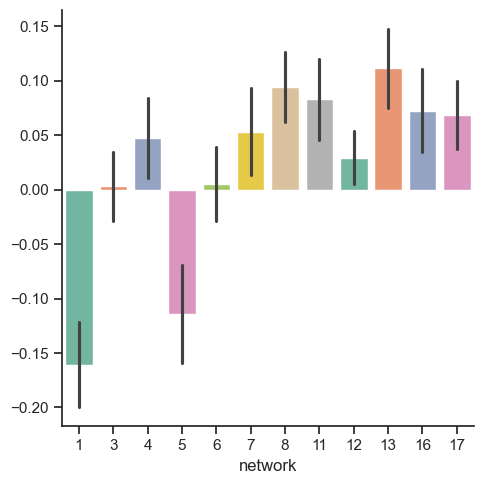

In [8]:
sns.catplot(data=corr_df, kind="bar", errorbar="se", palette="Set2")

#plt.grid()
plt.show()

Not very elegant... we can do better by plotting the distributions as violin plots:

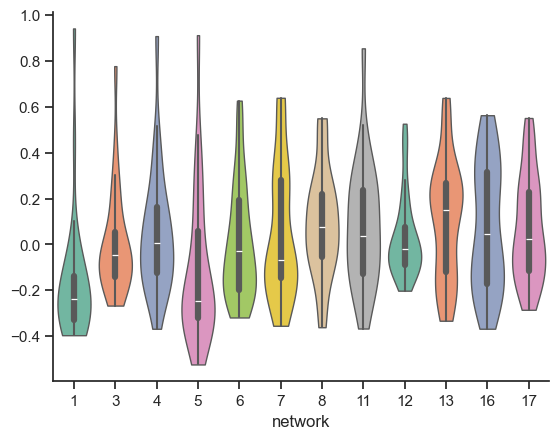

In [13]:
sns.violinplot(data=corr_df, cut=0, linewidth=1, palette="Set2")

plt.show()

Another improvement is to show the actual data points. One solution is to add them on the violin plot instead of the boxplots in the middle...

In [14]:
?sns.violinplot

Signature:
sns.violinplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    inner='box',
    split=False,
    width=0.8,
    dodge='auto',
    gap=0,
    linewidth=None,
    linecolor='auto',
    cut=2,
    gridsize=100,
    bw_method='scott',
    bw_adjust=1,
    density_norm='area',
    common_norm=False,
    hue_norm=None,
    formatter=None,
    log_scale=None,
    native_scale=False,
    legend='auto',
    scale=<deprecated>,
    scale_hue=<deprecated>,
    bw=<deprecated>,
    inner_kws=None,
    ax=None,
    **kwargs,
)
Docstring:
Draw a patch representing a KDE and add observations or box plot statistics.

A violin plot plays a similar role as a box-and-whisker plot. It shows the
distribution of data points after grouping by one (or more) variables.
Unlike a box plot, each violin is drawn using a kernel density estimate
of the underlying dist

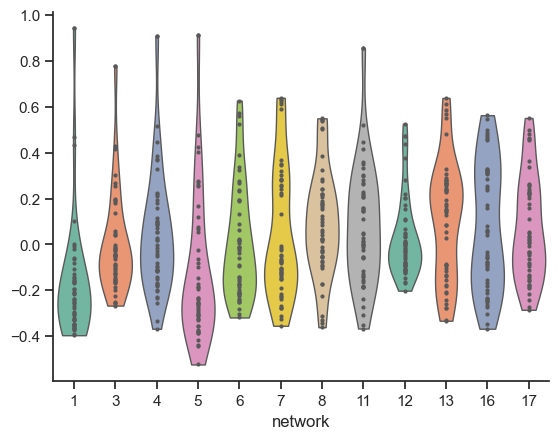

In [15]:
sns.violinplot(data=corr_df, cut=0, linewidth=1, palette="Set2", inner="point")

plt.show()

... or we can show them as a separate swarm plot:

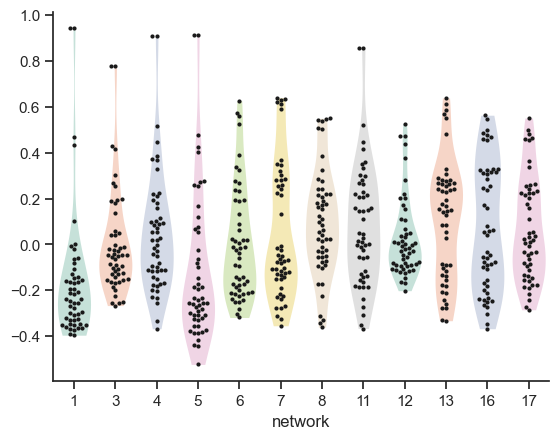

In [19]:
sns.violinplot(data=corr_df, cut=0, linewidth=0, palette="Set2", inner=None, alpha=0.4)
sns.swarmplot(corr_df, color="k", size=3)

plt.show()

#### What do you think changed from the previous visualizations?

We can also plot distributions (densities) of variables. Let's first generate some random bi-variate gaussian:

In [20]:
import numpy as np

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, 0.4), (0.4, 0.2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T
x[: n // 2] += 0.5

df = pd.DataFrame({"x": x, "y": y, "cat": [0] * (n // 2) + [1] * (n // 2)})

As first thing, we can simply plot the scatter  plot:

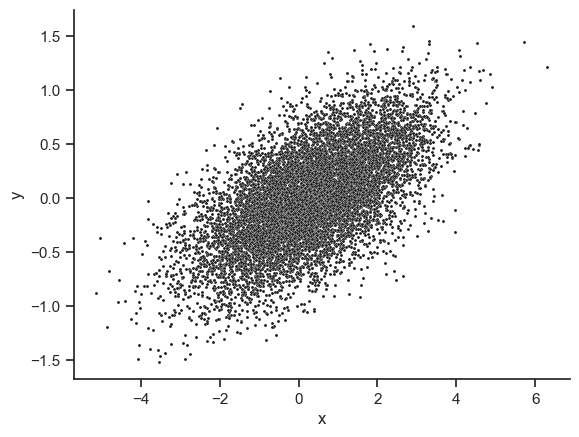

In [21]:
sns.scatterplot(df, x="x", y="y", color="k", s=5)
plt.show()

It's more interesting to look at it with a color on the category:

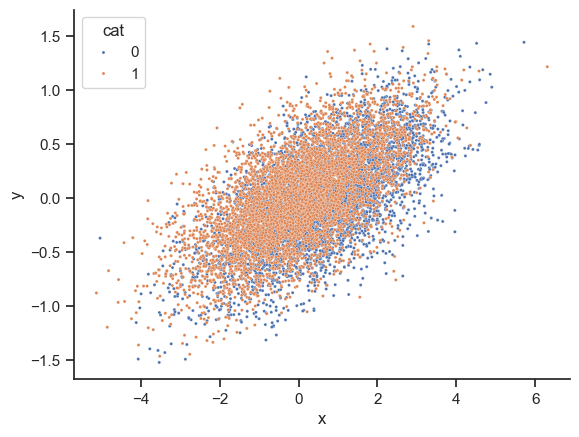

In [22]:
sns.scatterplot(df, x="x", y="y", hue="cat", s=5)
plt.show()

We can add marginal histograms to this plot, to see the distribution of data, especially in the different categories:

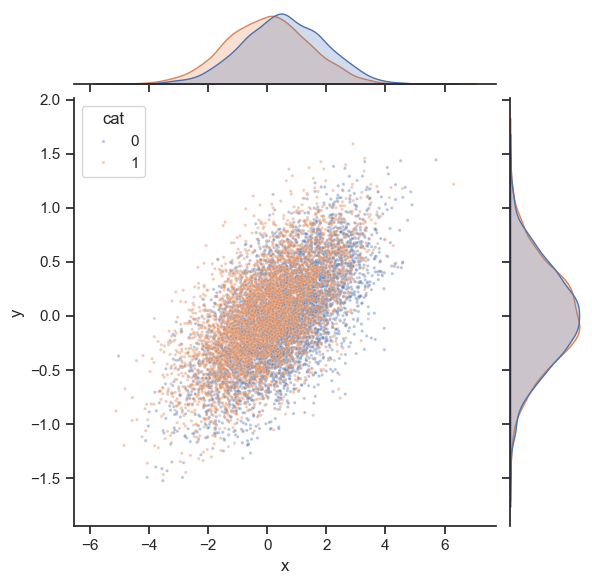

In [23]:
sns.jointplot(df, x="x", y="y", hue="cat", s=5, kind="scatter", alpha=0.4)
plt.show()

The density estimates can also be directly visualized ion the 2D plane:

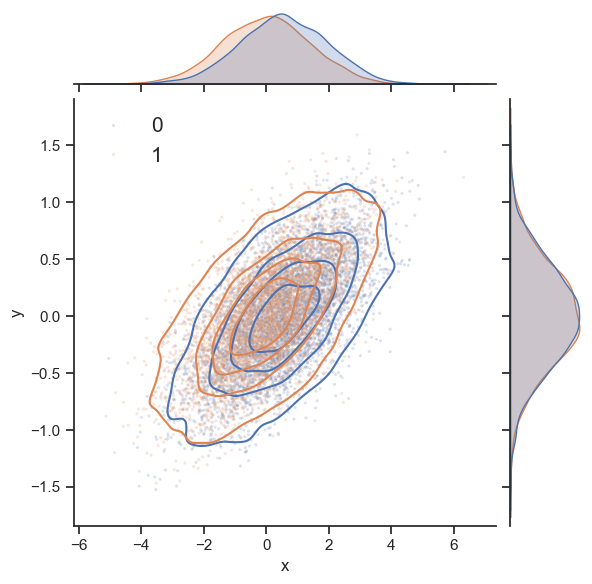

In [24]:
sns.jointplot(df, x="x", y="y", hue="cat", s=5, kind="scatter", alpha=0.2)
sns.kdeplot(df, x="x", y="y", hue="cat", levels=5)
plt.legend(frameon=False, fontsize=15)
plt.show()

KDE plots can be very customizable. Just an example:

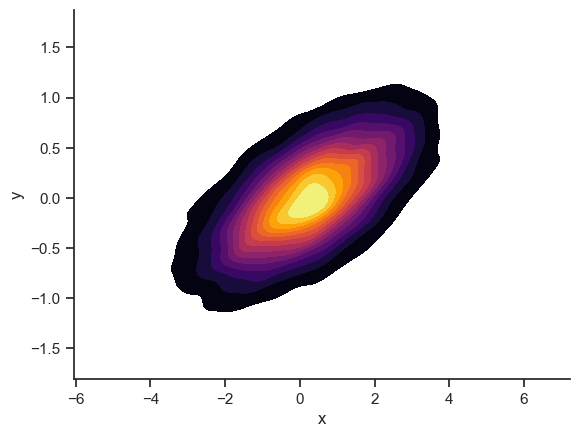

In [27]:
sns.kdeplot(df, x="x", y="y", levels=15, cmap="inferno", fill=True)

plt.show()

The best thing is to consult the plot page in seaborn and having a look at the examples there, e.g.: https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot